In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [470]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

from sklearn.model_selection import (
    cross_validate, cross_val_score, validation_curve, train_test_split, cross_val_predict, KFold)

In [471]:
from importlib import reload

import my_plots
reload(my_plots)
from my_plots import task_plot_2, task_plot_3, task_plot_4, task_plot_5

In [472]:
df = pd.read_csv("data.csv")
display(df)
df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [473]:
with open("info/none_values_info.txt", "w", encoding="utf-8") as f:
    df.info(buf=f)

In [474]:
with open("info/unique_values_info.txt", "w", encoding="utf-8") as f:
    for column in df.columns:
        unique_count = df[column].nunique()
        f.write(f"{column}: {unique_count}\n")

Избавимся от столбцов с наибольшим количеством незаполненных данных

In [475]:
print(f"Shape before: {df.shape}")

cols_to_drop = ["Id"]
for col in df.columns:
    if df[col].count() < 0.9 * df.shape[0]:
        cols_to_drop.append(col)
print(cols_to_drop)

df = df.drop(cols_to_drop, axis=1)
df = df.dropna()
print(f"Shape after: {df.shape}")

Shape before: (1460, 81)
['Id', 'LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
Shape after: (1338, 73)


Выделим категориальные переменные и обобщим в группы числовые переменные

In [476]:
def transform_dataframe(data, numeric_threshold):

    for column in data.columns:

        if data[column].dtype == 'object':
            # Применяем LabelEncoding для нечисловых значений
            label_encoder = LabelEncoder()
            data[column] = label_encoder.fit_transform(data[column].astype(str))

        elif pd.api.types.is_numeric_dtype(data[column]):
            # Обобщаем числовые значения, если количество уникальных значений больше заданного порога
            unique_values = data[column].nunique()
            total_count = data.shape[0]
            if unique_values > numeric_threshold * total_count:
                bins = int(total_count * numeric_threshold)
                data[column] = pd.cut(data[column], bins=bins, labels=False)

    return data

In [477]:
df = transform_dataframe(df, numeric_threshold=0.2)
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,64
1,20,3,10,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,54
2,60,3,12,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,69
3,70,3,10,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,38
4,60,3,16,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,79


Определим зависимую и независимые переменные

In [478]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [479]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

Разделим на обучающую и тестовую выборку

In [480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [481]:
cv = 5
random_state = 42

# Задание 1

In [482]:
depths = range(1, 15)
len_depths = len(depths)

Проведём исследование для тренировочного набора

Optimal score: 0.0027365738885519767
Optimal depth: 10


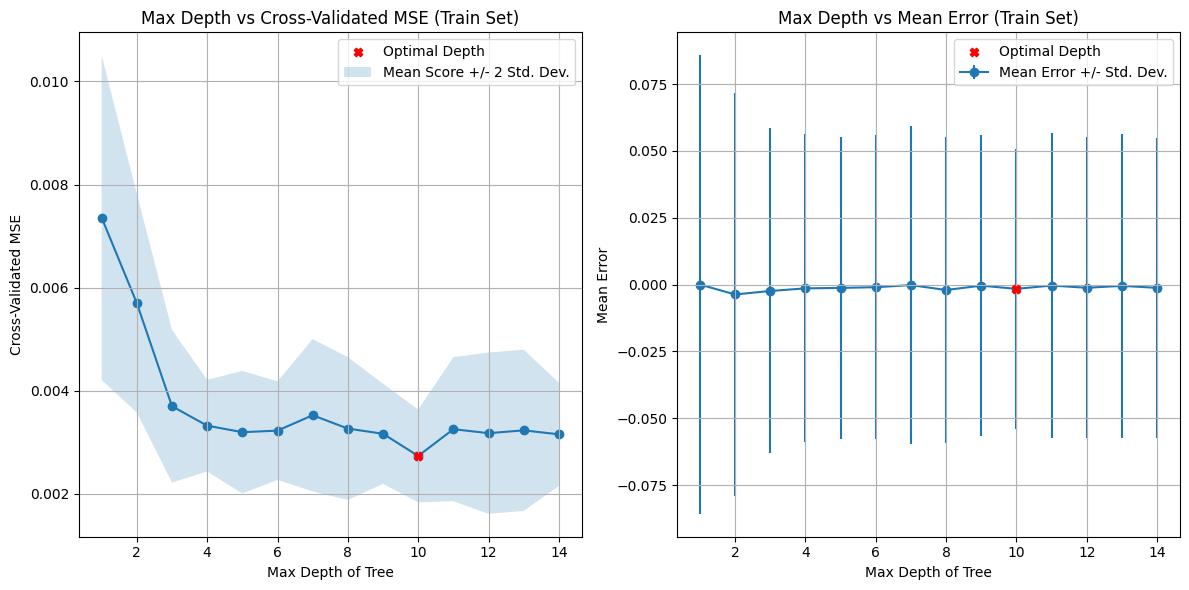

In [483]:
optimal_train_score, optimal_train_depth = task_plot_2(X_train=X_train, y_train=y_train, label="Train Set")

Проведём исследование для тестового набора

Optimal score: 0.0035347935278645277
Optimal depth: 5


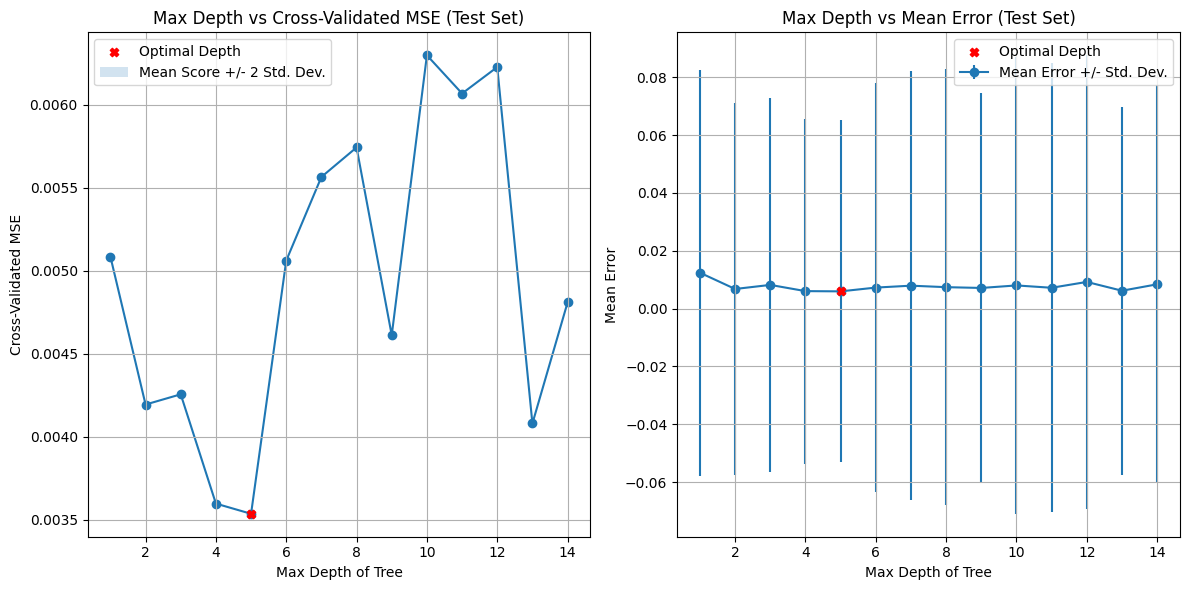

In [484]:
optimal_test_score, optimal_test_depth = task_plot_2(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, label="Test Set")

MSE: 0.006299519416476074


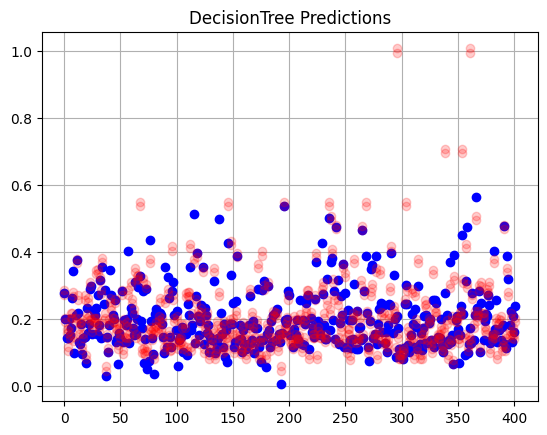

In [485]:
mse = task_plot_3(X_train, y_train, X_test, y_test, depth=optimal_train_depth)

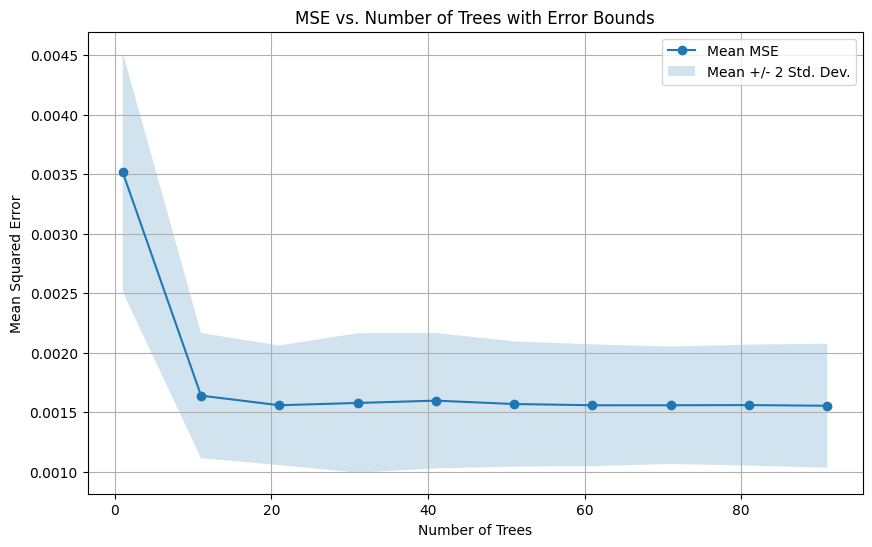

In [486]:
trees = range(1, 101, 10)

train_scores, test_scores = validation_curve(
    RandomForestRegressor(random_state=random_state),
    X_train, y_train, param_name='n_estimators',
    param_range=trees, cv=cv, scoring='neg_mean_squared_error')

mean_errors = -np.mean(test_scores, axis=1)
std_errors = np.std(-test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(trees, mean_errors, 'o-', label='Mean MSE')
plt.fill_between(trees, mean_errors - 2 * std_errors, mean_errors + 2 * std_errors,
                 alpha=0.2, label='Mean +/- 2 Std. Dev.')

plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Trees with Error Bounds')
plt.grid(True)
plt.legend()
plt.show()

# Задание 2

## a) Без использования bagging

Tree 1: Mean R^2 = 0.4446, Variance R^2 = 0.0058
Tree 2: Mean R^2 = 0.5705, Variance R^2 = 0.0021
Tree 3: Mean R^2 = 0.7225, Variance R^2 = 0.0006
Tree 4: Mean R^2 = 0.7401, Variance R^2 = 0.0042
Tree 5: Mean R^2 = 0.7541, Variance R^2 = 0.0025
Tree 6: Mean R^2 = 0.7523, Variance R^2 = 0.0018
Tree 7: Mean R^2 = 0.7342, Variance R^2 = 0.0012
Tree 8: Mean R^2 = 0.7517, Variance R^2 = 0.0018
Tree 9: Mean R^2 = 0.7584, Variance R^2 = 0.0012
Tree 10: Mean R^2 = 0.7915, Variance R^2 = 0.0010
Tree 11: Mean R^2 = 0.7542, Variance R^2 = 0.0011
Tree 12: Mean R^2 = 0.7621, Variance R^2 = 0.0011
Tree 13: Mean R^2 = 0.7554, Variance R^2 = 0.0021
Tree 14: Mean R^2 = 0.7563, Variance R^2 = 0.0025
Average R^2 across all trees: 0.7177


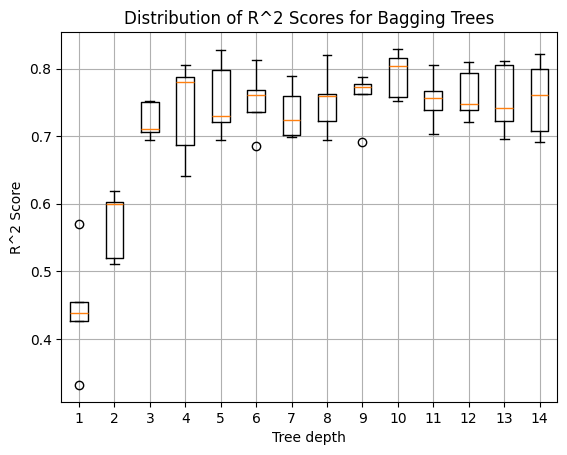

In [487]:
task_plot_4(X_train, y_train, bagging=False)

## b) С использованием bagging

Tree 1: Mean R^2 = 0.4473, Variance R^2 = 0.0051
Tree 2: Mean R^2 = 0.6602, Variance R^2 = 0.0002
Tree 3: Mean R^2 = 0.7499, Variance R^2 = 0.0007
Tree 4: Mean R^2 = 0.8071, Variance R^2 = 0.0013
Tree 5: Mean R^2 = 0.8217, Variance R^2 = 0.0010
Tree 6: Mean R^2 = 0.8250, Variance R^2 = 0.0011
Tree 7: Mean R^2 = 0.8275, Variance R^2 = 0.0008
Tree 8: Mean R^2 = 0.8382, Variance R^2 = 0.0018
Tree 9: Mean R^2 = 0.8315, Variance R^2 = 0.0014
Tree 10: Mean R^2 = 0.8201, Variance R^2 = 0.0011
Tree 11: Mean R^2 = 0.8413, Variance R^2 = 0.0018
Tree 12: Mean R^2 = 0.8335, Variance R^2 = 0.0011
Tree 13: Mean R^2 = 0.8304, Variance R^2 = 0.0011
Tree 14: Mean R^2 = 0.8329, Variance R^2 = 0.0012
Average R^2 across all trees: 0.7833


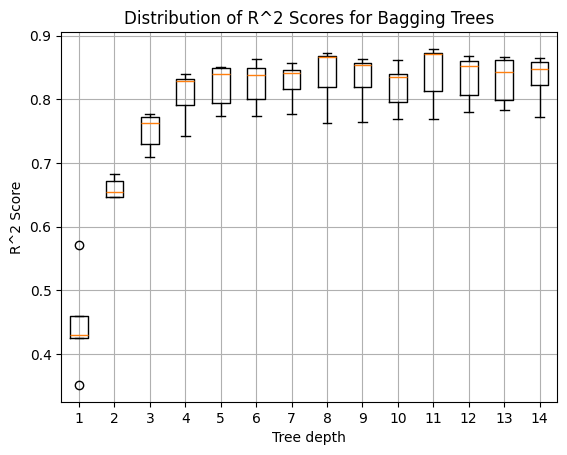

In [488]:
task_plot_4(X_train, y_train, bagging=True)

## c)

Minimum Variance: 0.010081555053572548
Number of Trees: 251
Minimum Bias: 0.0015492901647224994
Number of Trees: 51


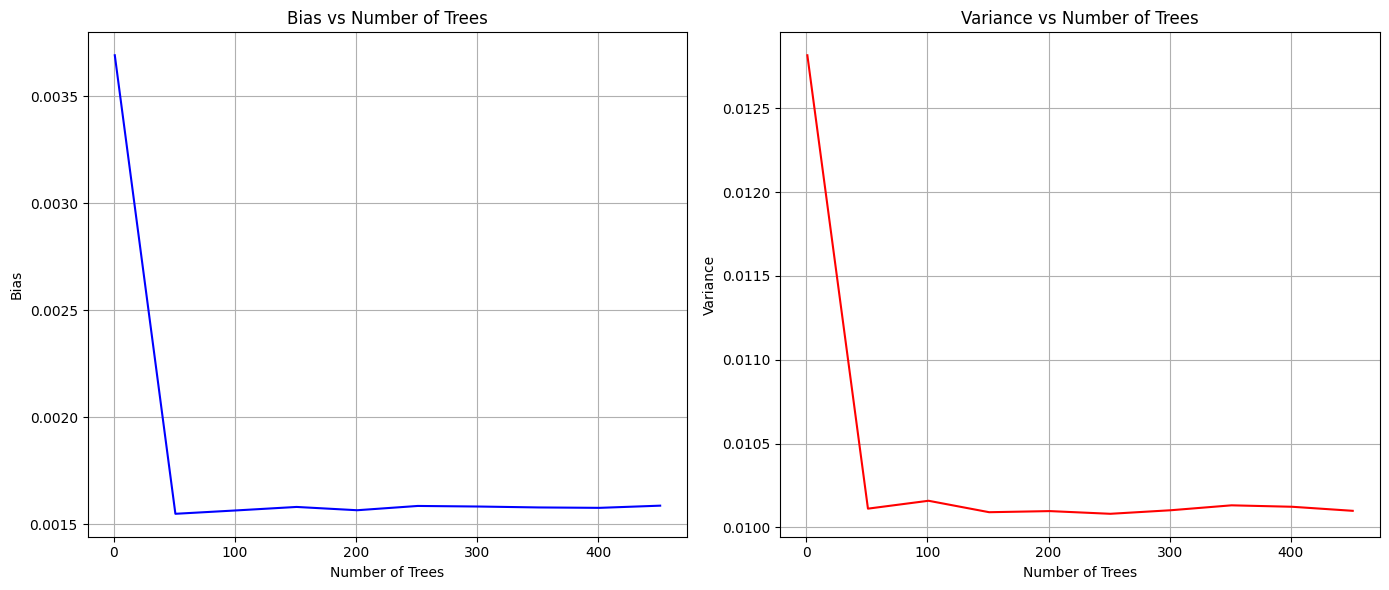

In [489]:
task_plot_5(X_train, y_train, depth=optimal_train_depth)

# Задание 3

Выполним предыдущие шаги из задания 2

Forest 1: Mean R^2 = 0.4575, Variance R^2 = 0.0052
Forest 2: Mean R^2 = 0.6804, Variance R^2 = 0.0010
Forest 3: Mean R^2 = 0.7785, Variance R^2 = 0.0003
Forest 4: Mean R^2 = 0.8284, Variance R^2 = 0.0005
Forest 5: Mean R^2 = 0.8545, Variance R^2 = 0.0004
Forest 6: Mean R^2 = 0.8697, Variance R^2 = 0.0004
Forest 7: Mean R^2 = 0.8769, Variance R^2 = 0.0003
Forest 8: Mean R^2 = 0.8791, Variance R^2 = 0.0003
Forest 9: Mean R^2 = 0.8808, Variance R^2 = 0.0003
Forest 10: Mean R^2 = 0.8843, Variance R^2 = 0.0003
Forest 11: Mean R^2 = 0.8855, Variance R^2 = 0.0004
Forest 12: Mean R^2 = 0.8801, Variance R^2 = 0.0003
Forest 13: Mean R^2 = 0.8843, Variance R^2 = 0.0003
Forest 14: Mean R^2 = 0.8857, Variance R^2 = 0.0003


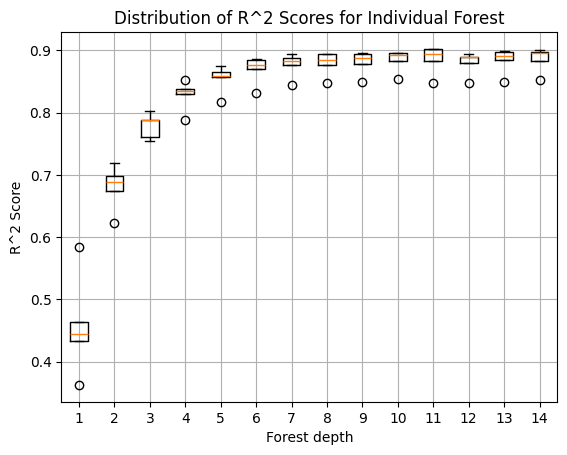

Average R^2 across all forest: 0.8233


In [490]:
n_estimators = 51

r2_scores = np.zeros((len_depths, cv), dtype=float)

for i, depth in enumerate(depths):
    forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, random_state=random_state)
    score = cross_val_score(forest, X_train, y_train, cv=cv, scoring='r2')
    r2_scores[i] = score

for i, r2 in enumerate(r2_scores):
    print(f"Forest {i+1}: Mean R^2 = {r2.mean():.4f}, Variance R^2 = {r2.var():.4f}")

plt.boxplot(r2_scores.T)
plt.xlabel('Forest depth')
plt.ylabel('R^2 Score')
plt.title('Distribution of R^2 Scores for Individual Forest')
plt.grid(True)
plt.show()

print(f"Average R^2 across all forest: {r2_scores.mean():.4f}")

Forest 1: Mean R^2 = 0.5100, Variance R^2 = 0.0041
Forest 2: Mean R^2 = 0.6876, Variance R^2 = 0.0006
Forest 3: Mean R^2 = 0.7744, Variance R^2 = 0.0004
Forest 4: Mean R^2 = 0.8152, Variance R^2 = 0.0002
Forest 5: Mean R^2 = 0.8307, Variance R^2 = 0.0004
Forest 6: Mean R^2 = 0.8418, Variance R^2 = 0.0005
Forest 7: Mean R^2 = 0.8510, Variance R^2 = 0.0004
Forest 8: Mean R^2 = 0.8499, Variance R^2 = 0.0005
Forest 9: Mean R^2 = 0.8452, Variance R^2 = 0.0002
Forest 10: Mean R^2 = 0.8479, Variance R^2 = 0.0007
Forest 11: Mean R^2 = 0.8471, Variance R^2 = 0.0003
Forest 12: Mean R^2 = 0.8537, Variance R^2 = 0.0003
Forest 13: Mean R^2 = 0.8437, Variance R^2 = 0.0006
Forest 14: Mean R^2 = 0.8521, Variance R^2 = 0.0003


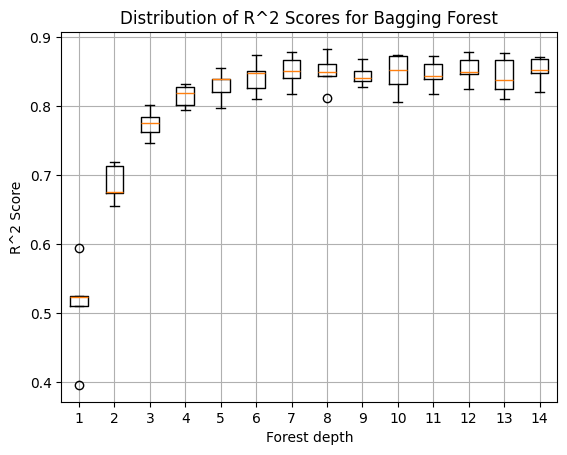

Average R^2 across all forest: 0.8036


In [491]:
n_estimators = 3

r2_scores = np.zeros((len_depths, cv), dtype=float)

for i, depth in enumerate(depths):
    forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, random_state=random_state)
    bagging_model = BaggingRegressor(forest, n_estimators=n_estimators, random_state=random_state)
    score = cross_val_score(bagging_model, X_train, y_train, cv=cv, scoring='r2')
    r2_scores[i] = score

for i, r2 in enumerate(r2_scores):
    print(f"Forest {i+1}: Mean R^2 = {r2.mean():.4f}, Variance R^2 = {r2.var():.4f}")

plt.boxplot(r2_scores.T)
plt.xlabel('Forest depth')
plt.ylabel('R^2 Score')
plt.title('Distribution of R^2 Scores for Bagging Forest')
plt.grid(True)
plt.show()

print(f"Average R^2 across all forest: {r2_scores.mean():.4f}")

In [492]:
n_estimators = range(1, 51, 10)
len_n_estimators = len(n_estimators)

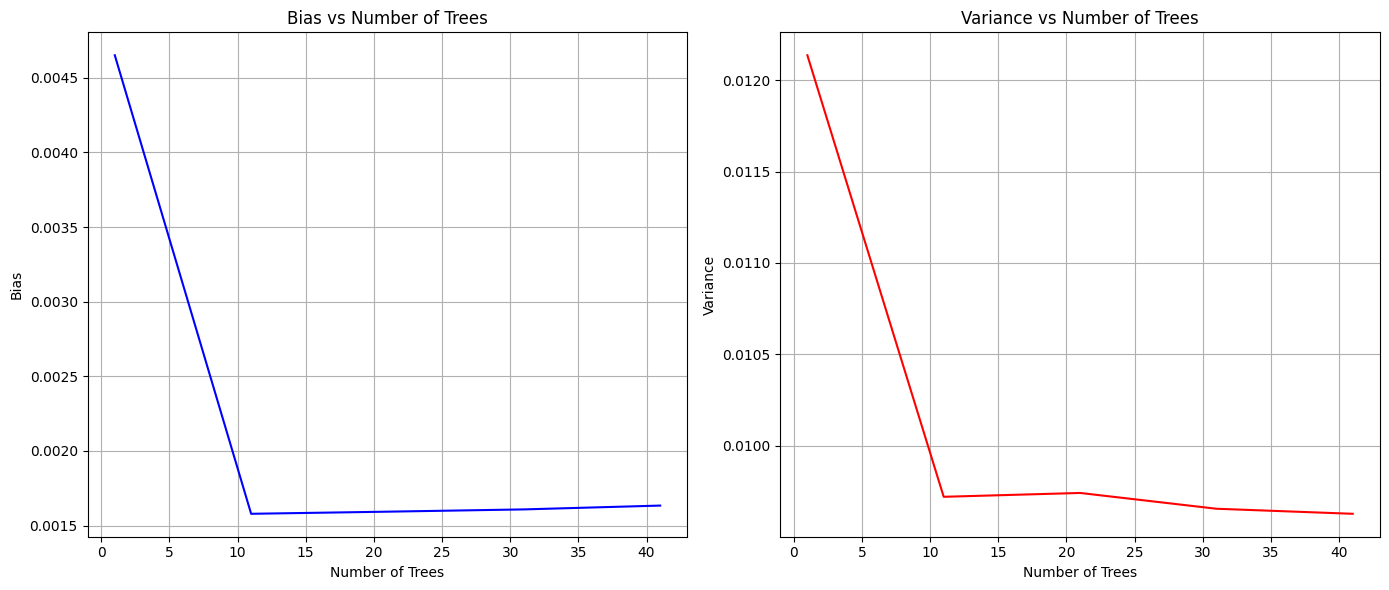

In [493]:
biases = np.zeros(len_n_estimators, dtype=float)
variances = np.zeros(len_n_estimators, dtype=float)

# kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
for i, n in enumerate(n_estimators):
    forest = RandomForestRegressor(n_estimators=n, max_depth=optimal_train_depth, random_state=random_state)
    bagging_reg = BaggingRegressor(forest, n_estimators=n, random_state=random_state, n_jobs=-1)
    y_pred = cross_val_predict(bagging_reg, X_train, y_train, cv=cv, n_jobs=-1)
    biases[i] = np.mean(np.mean((y_train - y_pred)**2))
    variances[i] = np.mean(np.var(y_pred))

# Построение графиков
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators, biases, label='Bias', color='blue')
plt.xlabel('Number of Trees')
plt.ylabel('Bias')
plt.title('Bias vs Number of Trees')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators, variances, label='Variance', color='red')
plt.xlabel('Number of Trees')
plt.ylabel('Variance')
plt.title('Variance vs Number of Trees')
plt.grid(True)

plt.tight_layout()
plt.show()

In [494]:
print(f"Minimum Variance: {np.min(variances)}")
print(f"Number of Trees: {n_estimators[np.argmin(variances)]}")
print(f"Minimum Bias: {np.min(biases)}")
print(f"Number of Trees: {n_estimators[np.argmin(biases)]}")

Minimum Variance: 0.009626783277134445
Number of Trees: 41
Minimum Bias: 0.001578961810550033
Number of Trees: 11


## a)

MSE: 0.003461789379066348


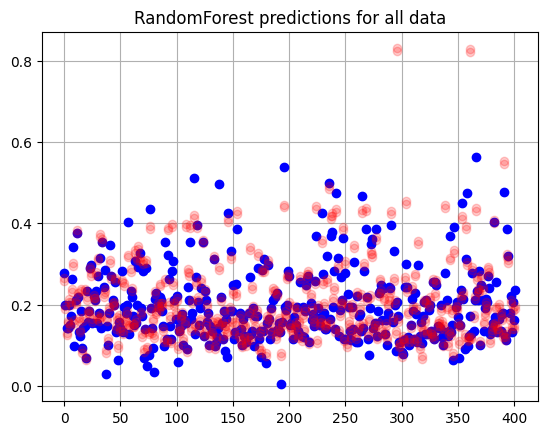

In [495]:
n_estimators = 51
forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=optimal_train_depth, random_state=random_state)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(f"MSE: {mse}")

plt.plot(y_test, 'bo')
plt.plot(y_pred - mse, 'ro', alpha=0.2)
plt.plot(y_pred + mse, 'ro', alpha=0.2)
plt.title('RandomForest predictions for all data')
plt.grid(True)
plt.show()

In [496]:
feature_importance = forest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df_sorted.head(10)

,Feature,Importance
14,OverallQual,0.575198
42,GrLivArea,0.135226
34,TotalBsmtSF,0.042742
39,1stFlrSF,0.024671
50,TotRmsAbvGrd,0.022490
30,BsmtFinSF1,0.021632
40,2ndFlrSF,0.019768
45,FullBath,0.018055
57,GarageArea,0.014706
2,LotArea,0.010642


## b)

Случайный лес с 3 признаками 

In [497]:
columns_3 = feature_importance_df_sorted["Feature"].values[:3]
X_train_3 = X_train[columns_3]
X_test_3 = X_test[columns_3]
X_train_3.head(10)

,OverallQual,GrLivArea,TotalBsmtSF
332,0.500,0.105263,0.060150
355,1.000,0.364662,0.263158
138,0.500,0.296992,0.120301
381,0.500,0.421053,0.210526
292,0.875,0.413534,0.187970
1090,0.750,0.191729,0.109023
1075,0.750,0.466165,0.263158
141,0.750,0.293233,0.109023
676,0.625,0.248120,0.124060
626,0.625,0.315789,0.180451


MSE: 0.005110427322600279


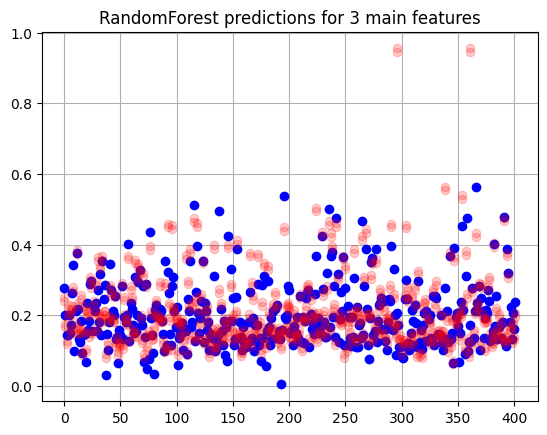

In [498]:
n_estimators = 51
forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=optimal_train_depth, random_state=random_state)
forest.fit(X_train_3, y_train)
y_pred = forest.predict(X_test_3)
mse = mean_squared_error(y_pred, y_test)
print(f"MSE: {mse}")

plt.plot(y_test, 'bo')
plt.plot(y_pred - mse, 'ro', alpha=0.2)
plt.plot(y_pred + mse, 'ro', alpha=0.2)
plt.title('RandomForest predictions for 3 main features')
plt.grid(True)
plt.show()

Случайный лес с 5 признаками 

In [499]:
columns_5 = feature_importance_df_sorted["Feature"].values[:5]
X_train_5 = X_train[columns_5]
X_test_5 = X_test[columns_5]
X_train_5.head(10)

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd
332,0.500,0.105263,0.060150,0.007519,0.222222
355,1.000,0.364662,0.263158,0.304511,0.666667
138,0.500,0.296992,0.120301,0.154135,0.555556
381,0.500,0.421053,0.210526,0.218045,0.777778
292,0.875,0.413534,0.187970,0.187970,0.666667
1090,0.750,0.191729,0.109023,0.075188,0.222222
1075,0.750,0.466165,0.263158,0.398496,0.666667
141,0.750,0.293233,0.109023,0.078947,0.555556
676,0.625,0.248120,0.124060,0.097744,0.444444
626,0.625,0.315789,0.180451,0.176692,0.333333


MSE: 0.004725115102001289


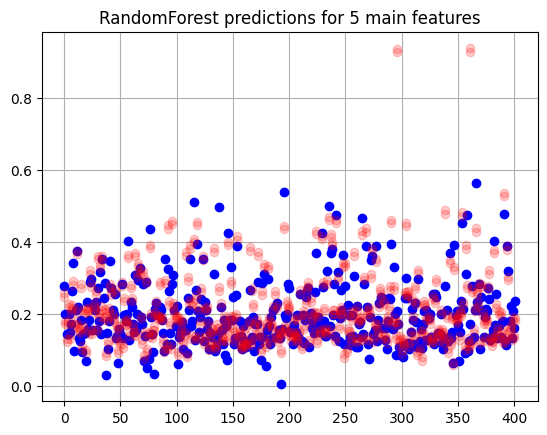

In [500]:
n_estimators = 51
forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=optimal_train_depth, random_state=random_state)
forest.fit(X_train_5, y_train)
y_pred = forest.predict(X_test_5)
mse = mean_squared_error(y_pred, y_test)
print(f"MSE: {mse}")

plt.plot(y_test, 'bo')
plt.plot(y_pred - mse, 'ro', alpha=0.2)
plt.plot(y_pred + mse, 'ro', alpha=0.2)
plt.title('RandomForest predictions for 5 main features')
plt.grid(True)
plt.show()

Случайный лес с 8 признаками 

In [501]:
columns_8 = feature_importance_df_sorted["Feature"].values[:8]
X_train_8 = X_train[columns_8]
X_test_8 = X_test[columns_8]
X_train_8.head(10)

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,BsmtFinSF1,2ndFlrSF,FullBath
332,0.500,0.105263,0.060150,0.007519,0.222222,0.026316,0.244361,0.333333
355,1.000,0.364662,0.263158,0.304511,0.666667,0.225564,0.285714,0.666667
138,0.500,0.296992,0.120301,0.154135,0.555556,0.071429,0.432331,0.666667
381,0.500,0.421053,0.210526,0.218045,0.777778,0.199248,0.609023,0.666667
292,0.875,0.413534,0.187970,0.187970,0.666667,0.000000,0.654135,1.000000
1090,0.750,0.191729,0.109023,0.075188,0.222222,0.000000,0.327068,0.666667
1075,0.750,0.466165,0.263158,0.398496,0.666667,0.124060,0.360902,0.666667
141,0.750,0.293233,0.109023,0.078947,0.555556,0.000000,0.578947,0.666667
676,0.625,0.248120,0.124060,0.097744,0.444444,0.000000,0.417293,0.666667
626,0.625,0.315789,0.180451,0.176692,0.333333,0.146617,0.436090,0.666667


MSE: 0.003876767218952525


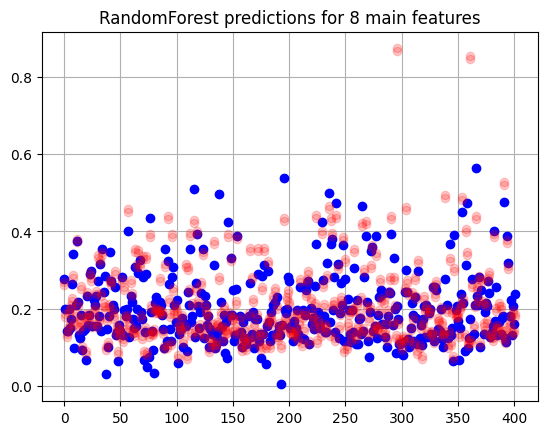

In [502]:
n_estimators = 51
forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=optimal_train_depth, random_state=random_state)
forest.fit(X_train_8, y_train)
y_pred = forest.predict(X_test_8)
mse = mean_squared_error(y_pred, y_test)
print(f"MSE: {mse}")

plt.plot(y_test, 'bo')
plt.plot(y_pred - mse, 'ro', alpha=0.2)
plt.plot(y_pred + mse, 'ro', alpha=0.2)
plt.title('RandomForest predictions for 8 main features')
plt.grid(True)
plt.show()